<a href="https://colab.research.google.com/github/TejaswiGithu/stockprice_LSTM_2/blob/main/Stock_Price_2_Figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize=(35,20))
import math

<Figure size 2520x1440 with 0 Axes>

In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tensorflow import keras

In [5]:
# from Keras. utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [7]:
stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv',index_col ='Date')

In [8]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,36.259998,37.130001,34.130001,37.009998,37.009998,1933600
2021-08-26,36.799999,36.845001,35.200001,36.279999,36.279999,1760100
2021-08-27,36.930000,39.720001,35.924999,39.450001,39.450001,3693800
2021-08-30,39.689999,42.180000,39.520000,41.849998,41.849998,2105900
2021-08-31,41.430000,41.930000,40.061001,41.009998,41.009998,1418400
...,...,...,...,...,...,...
2022-08-19,11.640000,11.770000,10.690000,10.800000,10.800000,3400300
2022-08-22,10.500000,10.640000,9.960000,10.160000,10.160000,3156500
2022-08-23,10.210000,10.500000,10.060000,10.100000,10.100000,2587800


In [9]:
stock_data=stock_data.reset_index()

In [10]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-25,36.259998,37.130001,34.130001,37.009998,37.009998,1933600
1,2021-08-26,36.799999,36.845001,35.200001,36.279999,36.279999,1760100
2,2021-08-27,36.930000,39.720001,35.924999,39.450001,39.450001,3693800
3,2021-08-30,39.689999,42.180000,39.520000,41.849998,41.849998,2105900
4,2021-08-31,41.430000,41.930000,40.061001,41.009998,41.009998,1418400
...,...,...,...,...,...,...,...
248,2022-08-19,11.640000,11.770000,10.690000,10.800000,10.800000,3400300
249,2022-08-22,10.500000,10.640000,9.960000,10.160000,10.160000,3156500
250,2022-08-23,10.210000,10.500000,10.060000,10.100000,10.100000,2587800
251,2022-08-24,10.070000,10.300000,9.950000,10.100000,10.100000,2779700


In [11]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date',inplace=True)

In [13]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,36.259998,37.130001,34.130001,37.009998,37.009998,1933600
2021-08-26,36.799999,36.845001,35.200001,36.279999,36.279999,1760100
2021-08-27,36.930000,39.720001,35.924999,39.450001,39.450001,3693800
2021-08-30,39.689999,42.180000,39.520000,41.849998,41.849998,2105900
2021-08-31,41.430000,41.930000,40.061001,41.009998,41.009998,1418400
...,...,...,...,...,...,...
2022-08-19,11.640000,11.770000,10.690000,10.800000,10.800000,3400300
2022-08-22,10.500000,10.640000,9.960000,10.160000,10.160000,3156500
2022-08-23,10.210000,10.500000,10.060000,10.100000,10.100000,2587800


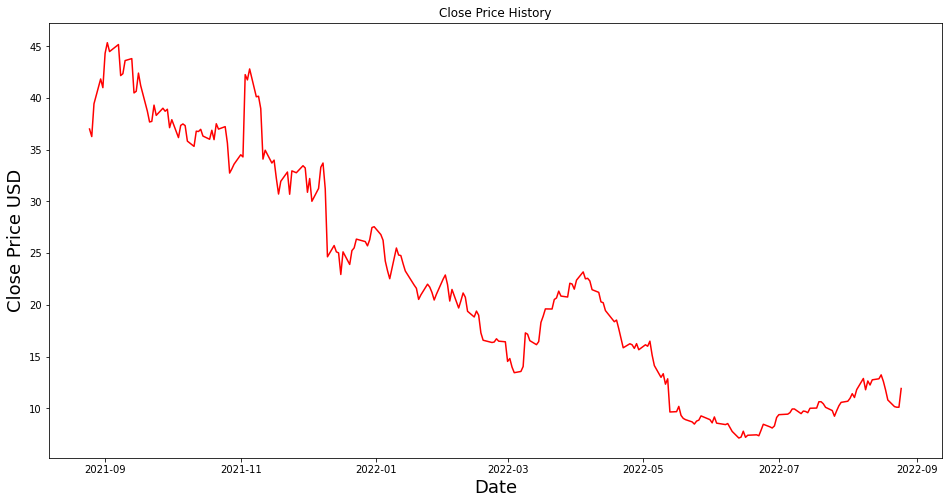

In [14]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_data['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [15]:
# create a new data frame with only 'Close column'
data = stock_data.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

203

In [16]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.78164219],
       [0.76255226],
       [0.84544979],
       [0.90821122],
       [0.88624469],
       [0.97306488],
       [1.        ],
       [0.97751043],
       [0.99529286],
       [0.91684098],
       [0.92154812],
       [0.95475942],
       [0.95972801],
       [0.87290793],
       [0.87709203],
       [0.92311708],
       [0.89147485],
       [0.82688288],
       [0.79942464],
       [0.8009937 ],
       [0.84205019],
       [0.81616112],
       [0.834205  ],
       [0.82662132],
       [0.83158988],
       [0.78504179],
       [0.8051778 ],
       [0.75993722],
       [0.79079498],
       [0.79445605],
       [0.79027195],
       [0.75104601],
       [0.73770924],
       [0.77615058],
       [0.77536609],
       [0.78085772],
       [0.76385986],
       [0.75575312],
       [0.77850414],
       [0.75470709],
       [0.79497906],
       [0.78138073],
       [0.78765694],
       [0.74607744],
       [0.67024057],
       [0.68070087],
       [0.69273013],
       [0.716

In [45]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.78164219, 0.76255226, 0.84544979, 0.90821122, 0.88624469,
       0.97306488, 1.        , 0.97751043, 0.99529286, 0.91684098,
       0.92154812, 0.95475942, 0.95972801, 0.87290793, 0.87709203,
       0.92311708, 0.89147485, 0.82688288, 0.79942464, 0.8009937 ,
       0.84205019, 0.81616112, 0.834205  , 0.82662132, 0.83158988,
       0.78504179, 0.8051778 , 0.75993722, 0.79079498, 0.79445605,
       0.79027195, 0.75104601, 0.73770924, 0.77615058, 0.77536609,
       0.78085772, 0.76385986, 0.75575312, 0.77850414, 0.75470709,
       0.79497906, 0.78138073, 0.78765694, 0.74607744, 0.67024057,
       0.68070087, 0.69273013, 0.71652718, 0.71103557, 0.91919454,
       0.90585766, 0.93357738, 0.86323222, 0.86453973, 0.83315897,
       0.70554386, 0.72803343, 0.6956067 , 0.70292885, 0.65716525])]
[0.6171547694258691]



In [46]:
x_train 

[array([0.78164219, 0.76255226, 0.84544979, 0.90821122, 0.88624469,
        0.97306488, 1.        , 0.97751043, 0.99529286, 0.91684098,
        0.92154812, 0.95475942, 0.95972801, 0.87290793, 0.87709203,
        0.92311708, 0.89147485, 0.82688288, 0.79942464, 0.8009937 ,
        0.84205019, 0.81616112, 0.834205  , 0.82662132, 0.83158988,
        0.78504179, 0.8051778 , 0.75993722, 0.79079498, 0.79445605,
        0.79027195, 0.75104601, 0.73770924, 0.77615058, 0.77536609,
        0.78085772, 0.76385986, 0.75575312, 0.77850414, 0.75470709,
        0.79497906, 0.78138073, 0.78765694, 0.74607744, 0.67024057,
        0.68070087, 0.69273013, 0.71652718, 0.71103557, 0.91919454,
        0.90585766, 0.93357738, 0.86323222, 0.86453973, 0.83315897,
        0.70554386, 0.72803343, 0.6956067 , 0.70292885, 0.65716525]),
 array([0.76255226, 0.84544979, 0.90821122, 0.88624469, 0.97306488,
        1.        , 0.97751043, 0.99529286, 0.91684098, 0.92154812,
        0.95475942, 0.95972801, 0.87290793, 0.

In [47]:
y_train

[0.6171547694258691,
 0.649320092852508,
 0.6728555786387139,
 0.6166318091884988,
 0.6757321737517739,
 0.6710250609041563,
 0.6888074872173775,
 0.6830544277443925,
 0.6216003760041743,
 0.6563807621239341,
 0.5988493567246508,
 0.631276134119348,
 0.6848849454789502,
 0.6956067025207453,
 0.6302300828914728,
 0.4584204901040667,
 0.48692467345908275,
 0.4709727648804194,
 0.46835775448855244,
 0.4137029442023289,
 0.4709727648804194,
 0.43906902617497323,
 0.4741108662627912,
 0.4809100292649051,
 0.5031380883070584,
 0.4968619378435686,
 0.4861401285005197,
 0.5018305046592442,
 0.5324267643193838,
 0.5345187883232535,
 0.5146443118555358,
 0.5002614931939986,
 0.4476987330622716,
 0.42337862386562186,
 0.40298118716053377,
 0.480648522995593,
 0.462866096682372,
 0.46155856533581163,
 0.44116107632946977,
 0.42259415735893935,
 0.3867677723125583,
 0.37866107796388404,
 0.35067993329811886,
 0.3619246505772843,
 0.38912132873636696,
 0.38179912704500196,
 0.3682008533420279,
 0.34

In [48]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [51]:
x_train.shape

(143, 60)

In [50]:
y_train

array([0.61715477, 0.64932009, 0.67285558, 0.61663181, 0.67573217,
       0.67102506, 0.68880749, 0.68305443, 0.62160038, 0.65638076,
       0.59884936, 0.63127613, 0.68488495, 0.6956067 , 0.63023008,
       0.45842049, 0.48692467, 0.47097276, 0.46835775, 0.41370294,
       0.47097276, 0.43906903, 0.47411087, 0.48091003, 0.50313809,
       0.49686194, 0.48614013, 0.5018305 , 0.53242676, 0.53451879,
       0.51464431, 0.50026149, 0.44769873, 0.42337862, 0.40298119,
       0.48064852, 0.4628661 , 0.46155857, 0.44116108, 0.42259416,
       0.38676777, 0.37866108, 0.35067993, 0.36192465, 0.38912133,
       0.38179913, 0.36820085, 0.34911084, 0.36375525, 0.40167363,
       0.41239536, 0.38807528, 0.34649583, 0.37578451, 0.32897491,
       0.34701879, 0.3668933 , 0.35617154, 0.32060666, 0.30622384,
       0.3211297 , 0.31066945, 0.2659519 , 0.24738493, 0.24163182,
       0.24293932, 0.25104599, 0.24503137, 0.24346234, 0.19377615,
       0.20109832, 0.1793933 , 0.16527196, 0.16841004, 0.18096

In [23]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(143, 60, 1)

In [24]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [25]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
model.fit(x_train,y_train, batch_size=1, epochs=30)

Epoch 1/30
143/143 [==============================] - 14s 50ms/step - loss: 0.0092
Epoch 2/30
143/143 [==============================] - 7s 52ms/step - loss: 0.0041
Epoch 3/30
143/143 [==============================] - 5s 36ms/step - loss: 0.0034
Epoch 4/30
143/143 [==============================] - 4s 29ms/step - loss: 0.0040
Epoch 5/30
143/143 [==============================] - 4s 30ms/step - loss: 0.0031
Epoch 6/30
143/143 [==============================] - 8s 58ms/step - loss: 0.0025
Epoch 7/30
143/143 [==============================] - 8s 52ms/step - loss: 0.0016
Epoch 8/30
143/143 [==============================] - 7s 48ms/step - loss: 0.0023
Epoch 9/30
143/143 [==============================] - 6s 40ms/step - loss: 0.0018
Epoch 10/30
143/143 [==============================] - 4s 29ms/step - loss: 0.0019
Epoch 11/30
143/143 [==============================] - 4s 30ms/step - loss: 0.0020
Epoch 12/30
143/143 [==============================] - 4s 29ms/step - loss: 0.0018
Epoch 13/30


In [27]:
#create the testing data sets

test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [28]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [29]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [30]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.23254808502197266

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


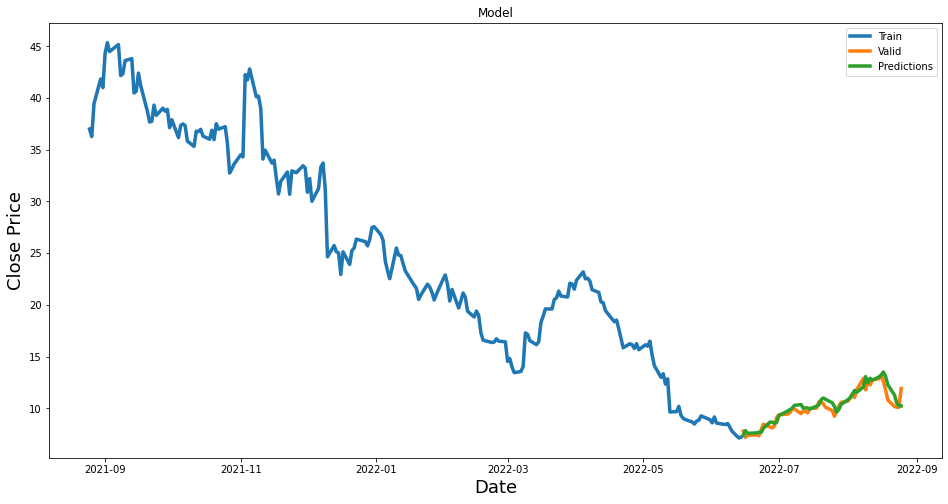

In [32]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [33]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2022-06-15,7.78,7.401907
2022-06-16,7.19,7.832111
2022-06-17,7.39,7.577385
2022-06-21,7.43,7.613655
2022-06-22,7.34,7.687672
2022-06-23,7.88,7.654333
2022-06-24,8.45,8.054553
2022-06-27,8.20,8.654435
2022-06-28,8.09,8.665183


In [34]:
#get the quote
tesla_quote = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[11.695291]], dtype=float32)